# Animation of the Four Cases Used in the Simulation

The simulation uses four cases to compare the effects of temperature and moisture variation on OLR hysteresis. 

Here, the restrictions on temperature and moisture profile are plotted to show how moisture and temperature variation are isolated. 

### Import Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

### Import Data

In [2]:
path = "./Data/"

rhum = xr.open_dataset(path + "rhum.nc", decode_times=False)
ts_2m = xr.open_dataset(path + "ts_2m.nc", decode_times=False)
temp = xr.open_dataset(path + "temp.nc", decode_times=False)

lats = temp.lat.values
lons = temp.lon.values

### Plotting

In [3]:
def plot(month_val=0):
    fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 15))

    fig.subplots_adjust(wspace=0.25, hspace=0.4)

    lav = 32.5
    lov = 237.5
    lc1 = "#7d7d7d"

    mean_ts = np.mean(ts_2m.sel(lat=lav, lon=lov).air.values)

    for i in range(12):
        axs[0, 0].plot(
            [
                j + (1 * ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts)
                for j in temp.sel(lat=lav, lon=lov).mean(dim="time").air.values
            ],
            temp.level.values,
            c=lc1,
            alpha=0.5,
        )

        axs[1, 0].plot(
            temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values,
            temp.level.values,
            c=lc1,
            alpha=0.5,
        )

        axs[2, 0].plot(
            [
                j + (1 * ts_2m.sel(lat=lav, lon=lov).air.values[i] - mean_ts)
                for j in temp.sel(lat=lav, lon=lov).mean(dim="time").air.values
            ],
            temp.level.values,
            c=lc1,
            alpha=0.5,
        )
        axs[2, 1].plot(
            rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values,
            rhum.level.values,
            c=lc1,
            alpha=0.5,
        )

        axs[3, 0].plot(
            temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[i]).air.values,
            temp.level.values,
            c=lc1,
            alpha=0.5,
        )
        axs[3, 1].plot(
            rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[i]).rhum.values,
            rhum.level.values,
            c=lc1,
            alpha=0.5,
        )

    axs[0, 0].plot(
        [
            j + (1 * ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts)
            for j in temp.sel(lat=lav, lon=lov).mean(dim="time").air.values
        ],
        temp.level.values,
        c="C0",
    )
    axs[0, 1].plot(
        rhum.sel(lat=lav, lon=lov).mean(dim="time").rhum.values,
        rhum.level.values,
        c="C1",
    )

    axs[1, 0].plot(
        temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values,
        temp.level.values,
        c="C0",
    )
    axs[1, 1].plot(
        rhum.sel(lat=lav, lon=lov).mean(dim="time").rhum.values,
        rhum.level.values,
        c="C1",
    )

    axs[2, 0].plot(
        [
            j + (1 * ts_2m.sel(lat=lav, lon=lov).air.values[month_val] - mean_ts)
            for j in temp.sel(lat=lav, lon=lov).mean(dim="time").air.values
        ],
        temp.level.values,
        c="C0",
    )
    axs[2, 1].plot(
        rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values,
        rhum.level.values,
        c="C1",
    )

    axs[3, 0].plot(
        temp.sel(lat=lav, lon=lov).sel(time=temp.time.values[month_val]).air.values,
        temp.level.values,
        c="C0",
    )
    axs[3, 1].plot(
        rhum.sel(lat=lav, lon=lov).sel(time=rhum.time.values[month_val]).rhum.values,
        rhum.level.values,
        c="C1",
    )

    for i1 in range(2):
        for i2 in range(4):
            axs[i2, i1].invert_yaxis()
            axs[i2, i1].set_ylabel("Pressure (mBar)")
            if i1 == 0:
                axs[i2, i1].set_xlabel("Temperature (K)")
            if i1 == 1:
                axs[i2, i1].set_xlabel("Relative Humidity (%)")

    xv = 1.1
    yv = 1.1

    axs[0, 0].text(
        xv,
        yv,
        r"Base Case",
        transform=axs[0, 0].transAxes,
        fontsize=12,
        horizontalalignment="center",
        verticalalignment="center",
    )
    axs[1, 0].text(
        xv,
        yv,
        r"Temperature Variation",
        transform=axs[1, 0].transAxes,
        fontsize=12,
        horizontalalignment="center",
        verticalalignment="center",
    )
    axs[2, 0].text(
        xv,
        yv,
        r"Moisture Variation",
        transform=axs[2, 0].transAxes,
        fontsize=12,
        horizontalalignment="center",
        verticalalignment="center",
    )
    axs[3, 0].text(
        xv,
        yv,
        r"Full Case",
        transform=axs[3, 0].transAxes,
        fontsize=12,
        horizontalalignment="center",
        verticalalignment="center",
    )

    # plt.savefig('./Figures/Four Cases.png', bbox_inches='tight') # Save the figure

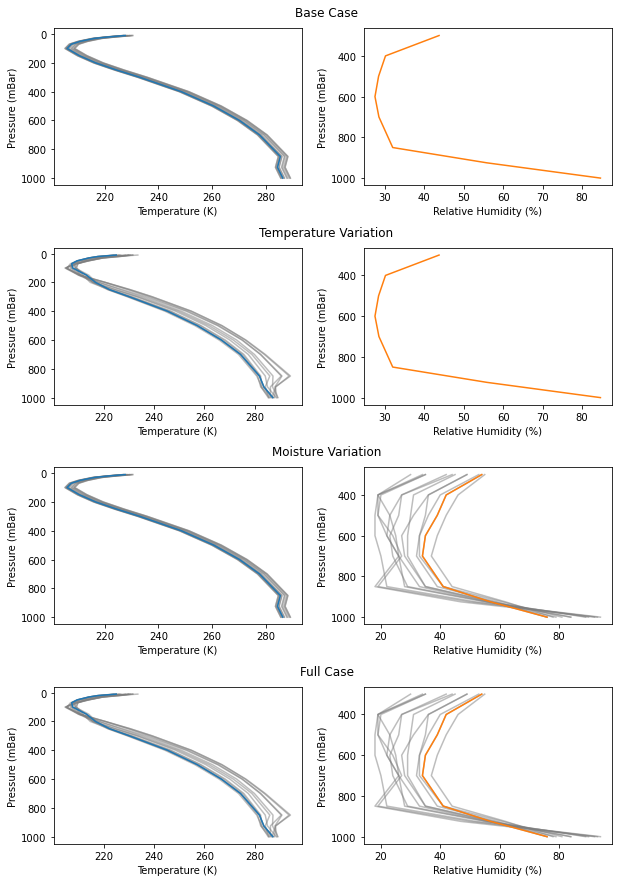

In [4]:
plot(0)  # Argument is desired month